In [90]:
# kmeans algorithm , problem - income and spending score

In [91]:
# required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [92]:
# dataset import and read first 5 rows
df = pd.read_csv("customers_500.csv")
df.head()



,Age,AnnualIncome,SpendingScore
0,56,14000,41
1,46,80588,6
2,32,111042,52
3,60,103610,26
4,25,113691,64


In [93]:
# model ku features select panni variable store panrom . No target because unsupervised model
x = df[['AnnualIncome','SpendingScore']]

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


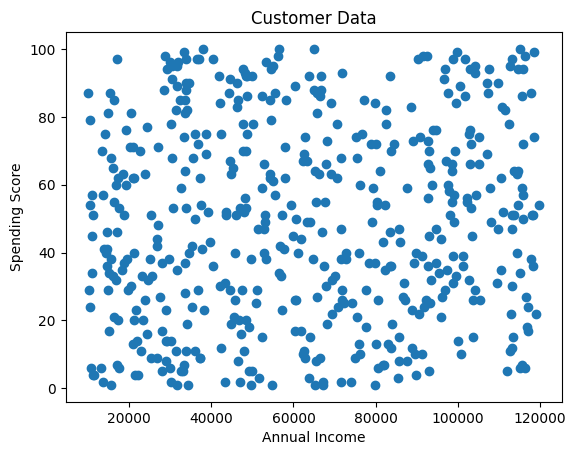

In [95]:
# visualize data pattern before cluster separate
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Data")
plt.show()


In [96]:
# create list as wcss to store the distance to the centroid with cluster
wcss = []


In [97]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


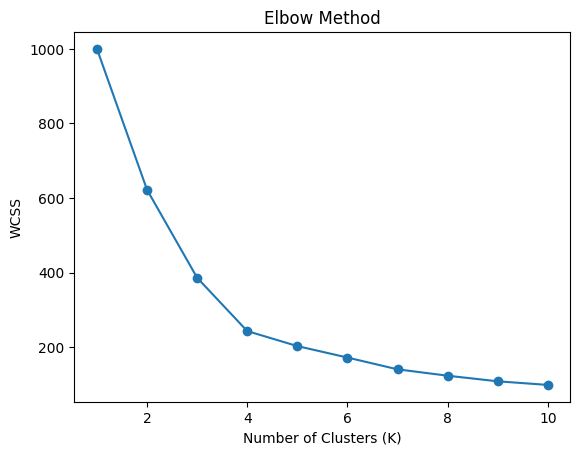

In [98]:
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [99]:
print("So from the elbow graph the best k value is : ",3)

So from the elbow graph the best k value is :  3


In [100]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


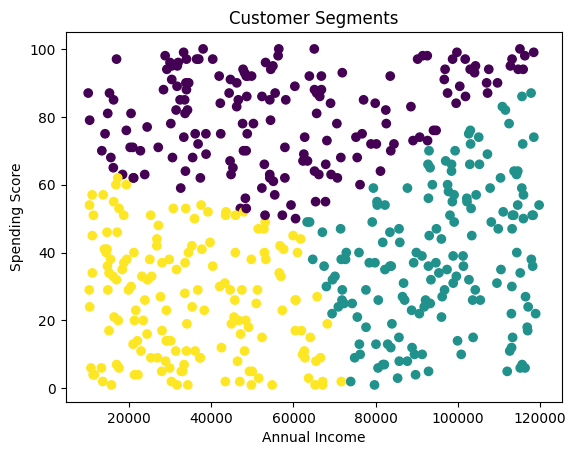

In [101]:
plt.scatter(df['AnnualIncome'], df['SpendingScore'],
            c=df['Cluster'], )
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()


In [102]:
print(kmeans.cluster_centers_)

[[-0.16519487  1.07861572]
 [ 1.00659442 -0.36497379]
 [-0.86034759 -0.78270106]]


In [103]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']